In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para el modelo y la evaluación------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Configuración para ver gráficos
%matplotlib inline
sns.set_style('whitegrid')

# Cargamos los datos
df = pd.read_csv('Credit_Card_Applications.csv')

# Mostrar las primeras filas para inspeccionar
print("Primeras 5 filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

Primeras 5 filas del dataset:
   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float6


Estadísticas descriptivas:
         CustomerID          A1          A2          A3          A4  \
count  6.900000e+02  690.000000  690.000000  690.000000  690.000000   
mean   1.569047e+07    0.678261   31.568203    4.758725    1.766667   
std    7.150647e+04    0.467482   11.853273    4.978163    0.430063   
min    1.556571e+07    0.000000   13.750000    0.000000    1.000000   
25%    1.563169e+07    0.000000   22.670000    1.000000    2.000000   
50%    1.569016e+07    1.000000   28.625000    2.750000    2.000000   
75%    1.575190e+07    1.000000   37.707500    7.207500    2.000000   
max    1.581544e+07    1.000000   80.250000   28.000000    3.000000   

               A5          A6          A7          A8          A9        A10  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.00000   
mean     7.372464    4.692754    2.223406    0.523188    0.427536    2.40000   
std      3.683265    1.992316    3.346513    0.499824    0.495080    4.86294   
min      1.0

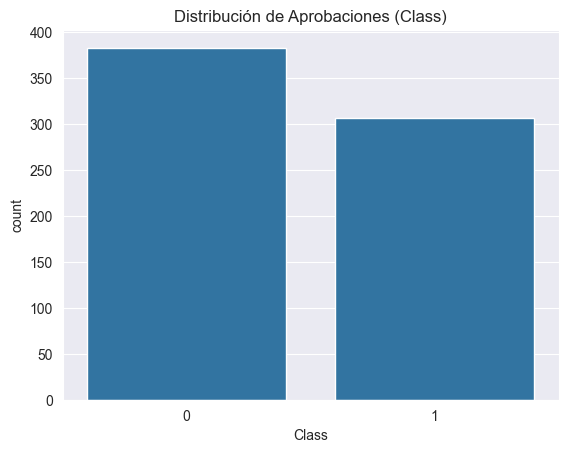

In [ ]:
# 2.1 Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

df.describe()

# 2.2 Verificar la distribución de la variable objetivo 'Class' 
print("\nDistribución de la variable 'Class' (0: Rechazado, 1: Aprobado):")
print(df['Class'].value_counts())

# Visualizar el balance de clases
sns.countplot(x='Class', data=df)
plt.title('Distribución de Aprobaciones (Class)')
plt.show()

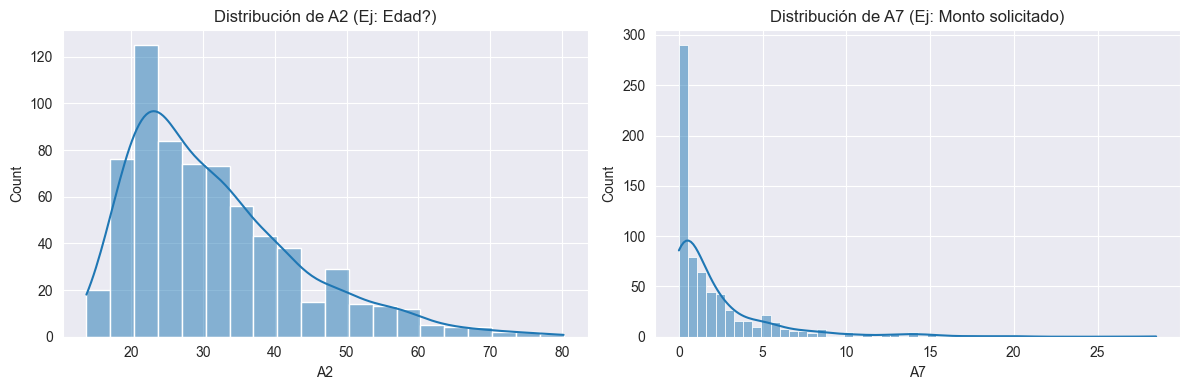

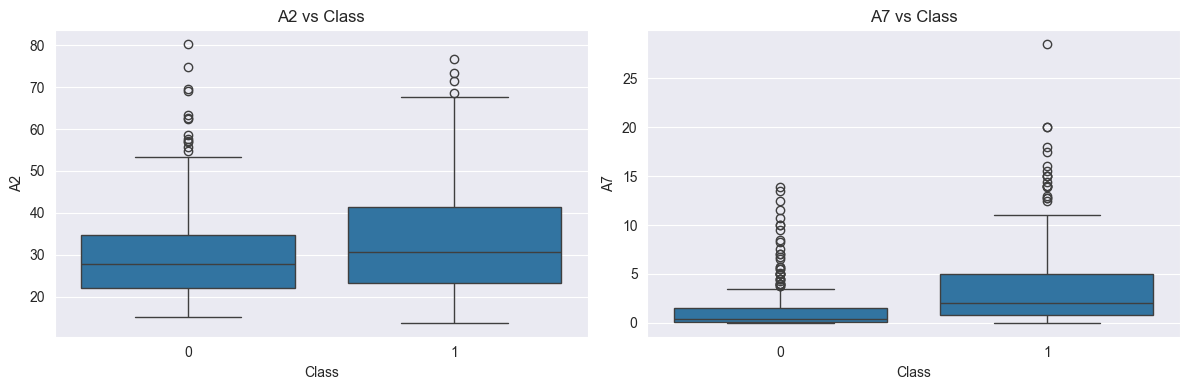

In [ ]:
# 2.3 Visualizar la distribución de algunas características numéricas importantes
# Por ejemplo, A2 (podría ser edad) y A14 (podría ser un monto)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma de A2
sns.histplot(df['A2'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de A2 (Ej: Edad?)')

# Histograma de A7
sns.histplot(df['A7'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de A7 (Ej: Monto solicitado)')
plt.tight_layout()
plt.show()

# 2.4 Boxplots para ver outliers (valores atípicos) en estas variables, separados por clase
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(x='Class', y='A2', data=df, ax=axes[0])
axes[0].set_title('A2 vs Class')

sns.boxplot(x='Class', y='A7', data=df, ax=axes[1])
axes[1].set_title('A7 vs Class')
plt.tight_layout()
plt.show()

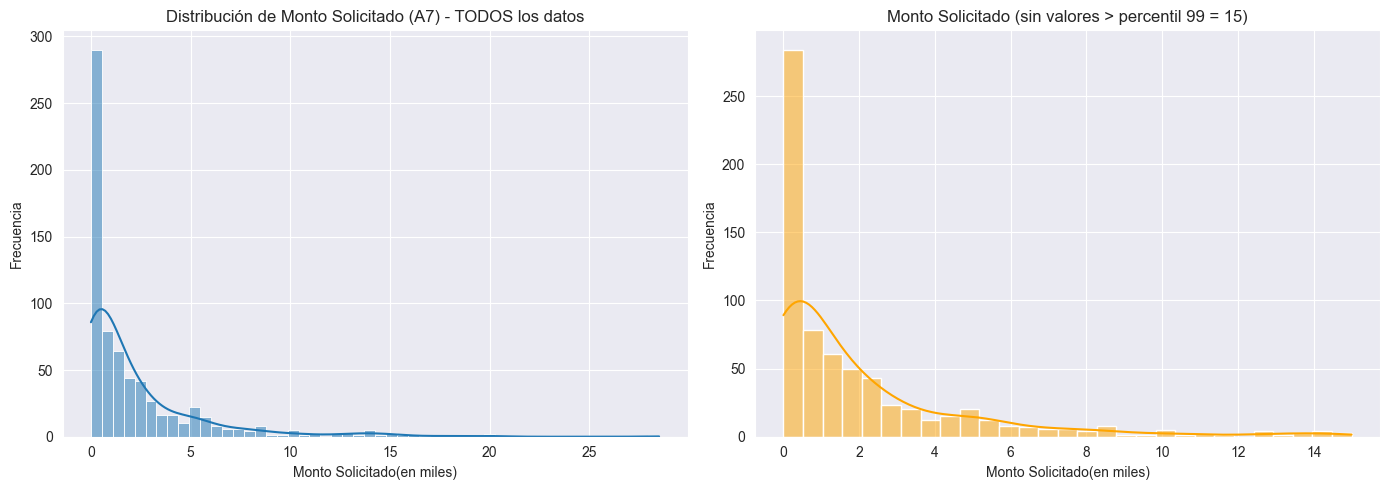

In [24]:
# Opción 1: Limitar el rango para ver mejor
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma con límite en eje Y
sns.histplot(df['A7'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Monto Solicitado (A7) - TODOS los datos')
axes[0].set_xlabel('Monto Solicitado(en miles)')
axes[0].set_ylabel('Frecuencia')

# Histograma sin outliers (filtrando valores extremos)
percentil_99 = df['A7'].quantile(0.99)
df_filtrado = df[df['A7'] < percentil_99]

sns.histplot(df_filtrado['A7'], kde=True, ax=axes[1], color='orange')
axes[1].set_title(f'Monto Solicitado (sin valores > percentil 99 = {percentil_99:.0f})')
axes[1].set_xlabel('Monto Solicitado(en miles)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Estadísticas de Monto Solicitado (A7) por Clase:
       count      mean       std  min    25%    50%  75%     max
Class                                                           
0      383.0  1.257924  2.120481  0.0  0.125  0.415  1.5  13.875
1      307.0  3.427899  4.120792  0.0  0.750  2.000  5.0  28.500


C:\Users\hp elitebook\AppData\Local\Temp\ipykernel_27212\2185273264.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Rechazado', 'Aprobado'])


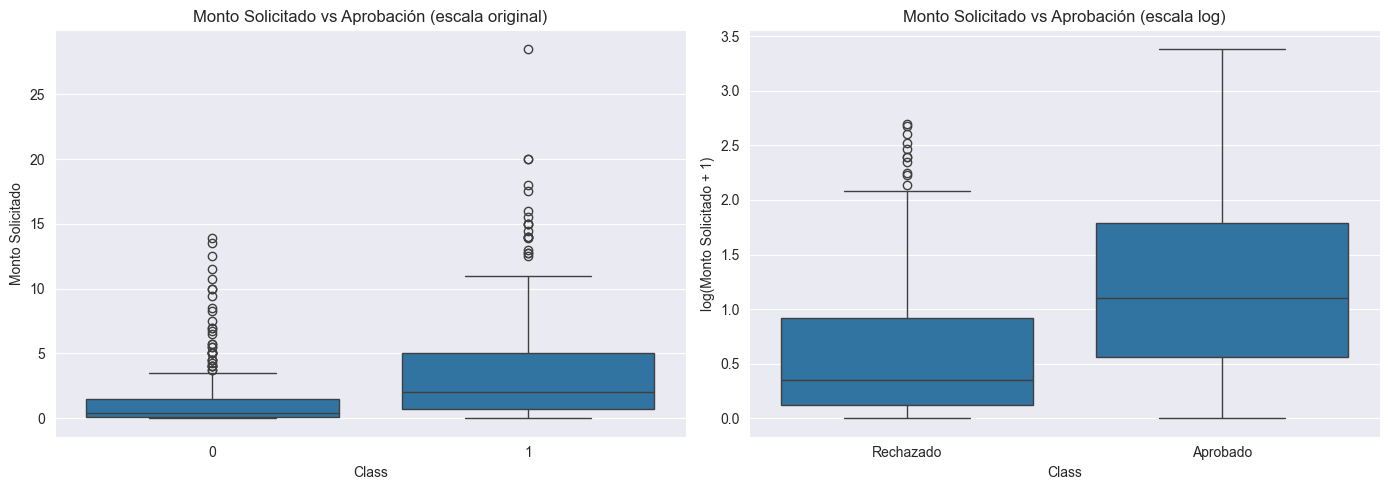

In [22]:
# Estadísticas descriptivas de A7 por clase
print("Estadísticas de Monto Solicitado (A7) por Clase:")
print(df.groupby('Class')['A7'].describe())

# Boxplot mejorado con escala logarítmica (útil para datos con outliers)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot normal
sns.boxplot(x='Class', y='A7', data=df, ax=axes[0])
axes[0].set_title('Monto Solicitado vs Aprobación (escala original)')
axes[0].set_ylabel('Monto Solicitado')

# Boxplot con escala logarítmica
df['A7_log'] = np.log1p(df['A7'])  # log(1+x) para manejar ceros
sns.boxplot(x='Class', y='A7_log', data=df, ax=axes[1])
axes[1].set_title('Monto Solicitado vs Aprobación (escala log)')
axes[1].set_ylabel('log(Monto Solicitado + 1)')
axes[1].set_xticklabels(['Rechazado', 'Aprobado'])

plt.tight_layout()
plt.show()

In [4]:
# 3.1 Manejo de Valores Faltantes
# Primero, veamos si hay valores nulos explícitos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# En datasets como este, los valores faltantes a menudo se codifican como '?' o 0 en lugares no esperados.
# Vamos a revisar si hay columnas que deberían ser categóricas pero tienen muchos ceros.
# Por ejemplo, la columna 'A1' parece binaria, pero veamos sus valores únicos:
print("\nValores únicos en A1:", df['A1'].unique())
print("Valores únicos en A4 (categórica?):", df['A4'].unique())
# Este análisis te ayudará a decidir si un 0 es un valor real o un missing.

# Por simplicidad en este proyecto, asumiremos que no hay valores nulos.
# Si los hubiera, una opción común es imputar con la media (para numéricas) o la moda (para categóricas).
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df['A2'] = imputer.fit_transform(df[['A2']])

# 3.2 Separar características (X) y variable objetivo (y)
# Eliminamos 'CustomerID' porque no es una característica predictiva, es solo un identificador.
X = df.drop(['CustomerID', 'Class'], axis=1)
y = df['Class']

# 3.3 Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# 3.4 Escalado de características (¡IMPORTANTE para Regresión Logística!)
# La regresión logística se beneficia enormemente de tener características en la misma escala.
# Usaremos StandardScaler para que tengan media 0 y desviación estándar 1.

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador SOLO con los datos de entrenamiento para evitar "data leakage"
X_train_scaled = scaler.fit_transform(X_train)

# Transformamos los datos de prueba con el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Convertimos de vuelta a DataFrame para mantener los nombres de las columnas (opcional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nPrimeras filas de X_train escalado:")
print(X_train_scaled.head())


Valores nulos por columna:
CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

Valores únicos en A1: [1 0]
Valores únicos en A4 (categórica?): [2 1 3]

Tamaño del conjunto de entrenamiento: (552, 14)
Tamaño del conjunto de prueba: (138, 14)

Primeras filas de X_train escalado:
         A1        A2        A3        A4        A5        A6        A7  \
0  0.724474 -0.812243 -0.835013 -1.801794  1.771054 -0.349298 -0.668315   
1  0.724474  0.410194 -0.859901 -1.801794  0.424838 -0.349298 -0.592595   
2  0.724474  0.016441 -0.791457 -1.801794 -0.382891 -0.349298  0.379643   
3  0.724474 -0.712732 -0.428495  0.543938 -1.729106 -1.840119 -0.654685   
4  0.724474 -0.318979  1.904835  0.543938  0.424838 -0.349298  1.061118   

         A8        A9       A10       A11       A12 

In [5]:
# 4.1 Crear y entrenar el modelo
# Usamos class_weight='balanced' para manejar automáticamente cualquier desbalance en las clases
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

print("Modelo de Regresión Logística entrenado.")

Modelo de Regresión Logística entrenado.



--- Evaluación del Modelo ---
Exactitud (Accuracy): 0.8188

Matriz de Confusión:
[[55 22]
 [ 3 58]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81        77
           1       0.72      0.95      0.82        61

    accuracy                           0.82       138
   macro avg       0.84      0.83      0.82       138
weighted avg       0.85      0.82      0.82       138



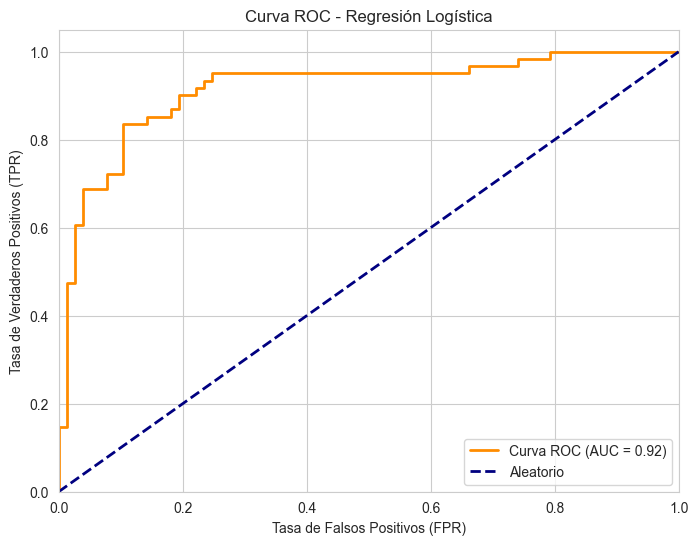

In [6]:
# 5.1 Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva (1)

# 5.2 Métricas de evaluación
print("\n--- Evaluación del Modelo ---")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 5.3 Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Importancia de las Características (basada en |coeficiente|):
   Característica  Coeficiente
7              A8     1.761206
13            A14     1.129719
4              A5     0.772000
9             A10     0.668377
12            A13    -0.395041
3              A4     0.343632
11            A12     0.319011
6              A7     0.240036
2              A3    -0.149644
10            A11    -0.112376


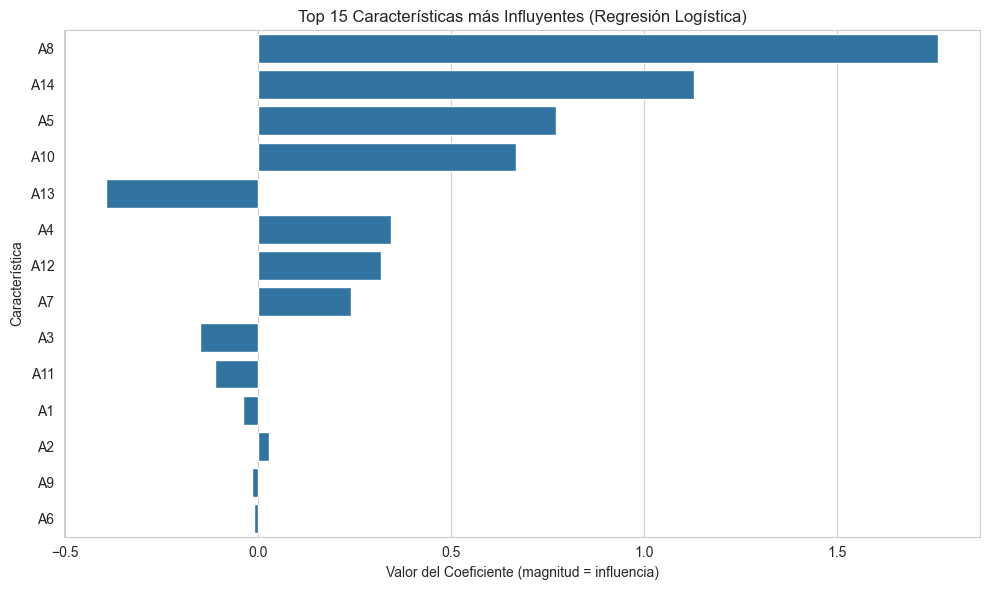

In [7]:
# 6.1 Obtener los coeficientes del modelo
coeficientes = model.coef_[0]
nombres_caracteristicas = X.columns

# Crear un DataFrame para verlos ordenados
feature_importance = pd.DataFrame({'Característica': nombres_caracteristicas, 'Coeficiente': coeficientes})
feature_importance = feature_importance.sort_values(by='Coeficiente', key=abs, ascending=False)

print("\nImportancia de las Características (basada en |coeficiente|):")
print(feature_importance.head(10)) # Mostrar las 10 más importantes

# Graficar la importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=feature_importance.head(15))
plt.title('Top 15 Características más Influyentes (Regresión Logística)')
plt.xlabel('Valor del Coeficiente (magnitud = influencia)')
plt.tight_layout()
plt.show()

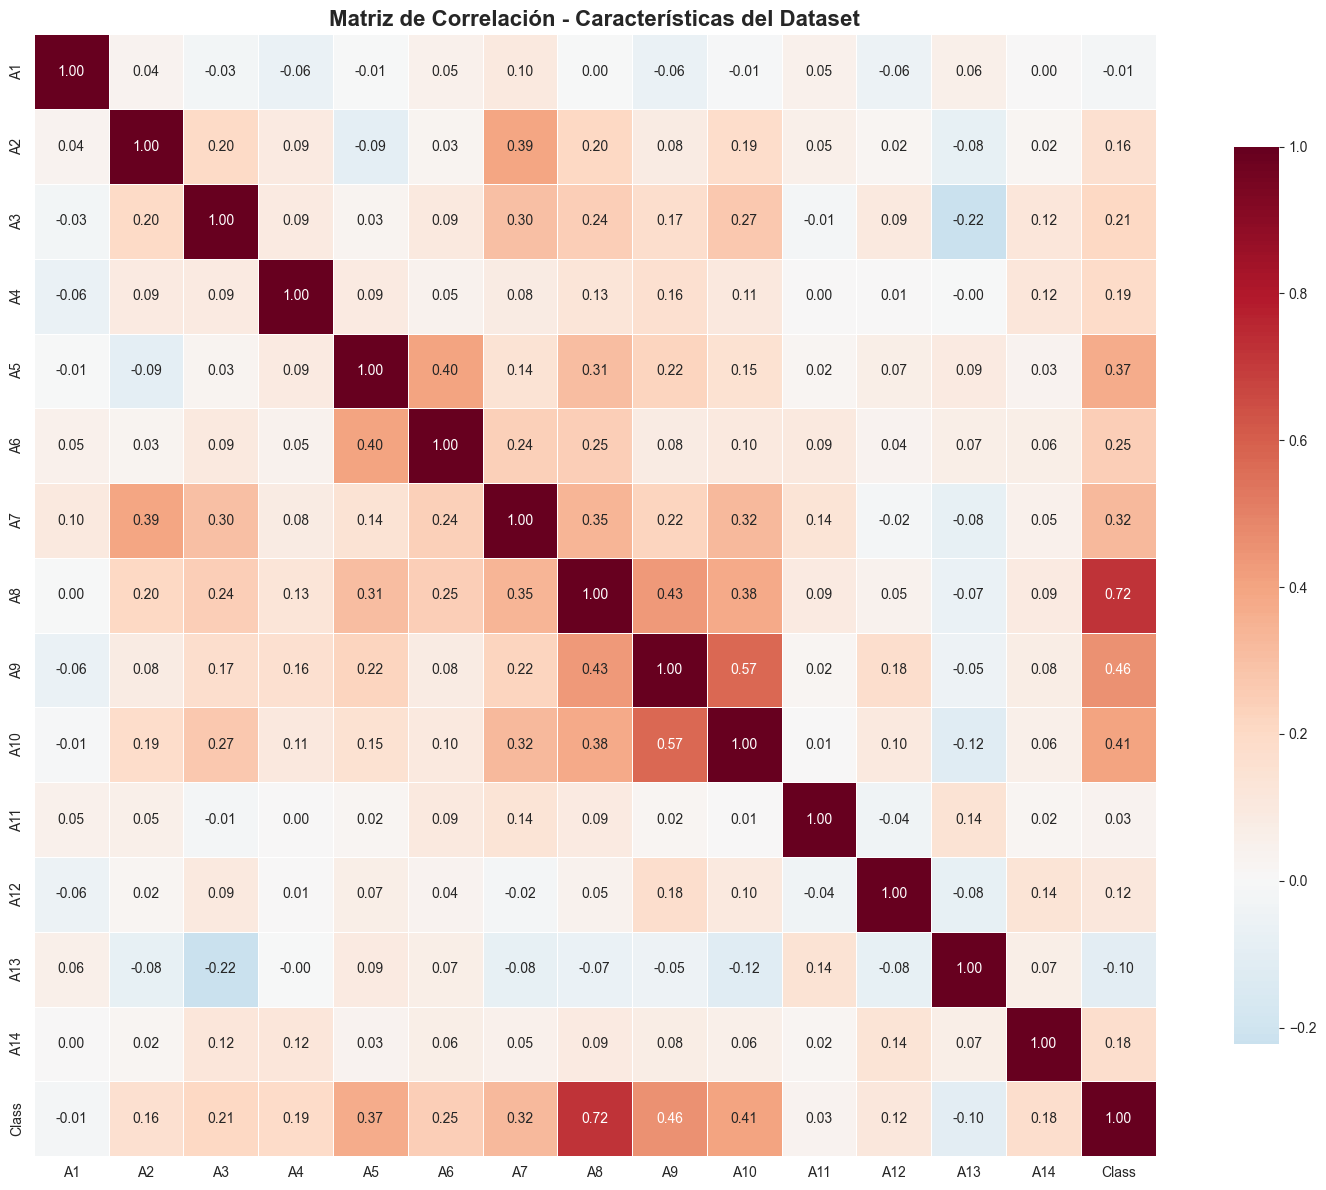

In [13]:
### comprando con la multicolinealidad 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Después de cargar tus datos (df)
# Seleccionar solo columnas numéricas (excluyendo CustomerID)
df_numerico = df.drop(['CustomerID'], axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Visualizar con un heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar los valores
            fmt='.2f',            # Formato con 2 decimales
            cmap='RdBu_r',        # Colores rojo-azul (rojo=correlación positiva, azul=negativa)
            center=0,             # Centro en 0
            square=True,           # Celdas cuadradas
            linewidths=0.5,        # Líneas entre celdas
            cbar_kws={"shrink": 0.8})  # Barra de color más pequeña
plt.title('Matriz de Correlación - Características del Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\hp elitebook\AppData\Local\Temp\ipykernel_27212\2209948698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacion_con_class.values,


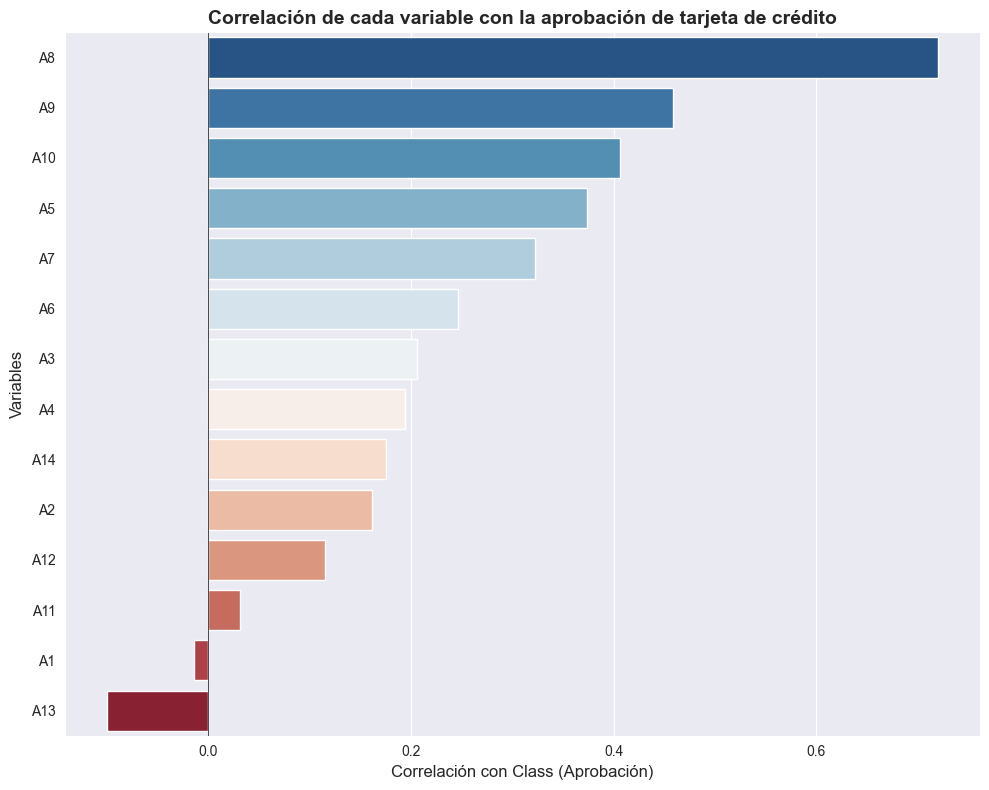

In [14]:
# Correlación de todas las variables con 'Class'
correlacion_con_class = df_numerico.corr()['Class'].drop('Class').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlacion_con_class.values, 
            y=correlacion_con_class.index,
            palette='RdBu_r')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Correlación con Class (Aprobación)', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title('Correlación de cada variable con la aprobación de tarjeta de crédito', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [15]:
# Identificar pares de variables con alta correlación (>0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j],
                                   correlation_matrix.iloc[i, j]))

print("Pares con alta correlación (posible redundancia):")
for pair in high_corr_pairs:
    print(f"{pair[0]} ↔ {pair[1]}: {pair[2]:.2f}")

Pares con alta correlación (posible redundancia):


In [16]:
# Variables con mayor correlación absoluta con Class
top_corr = abs(df_numerico.corr()['Class']).sort_values(ascending=False).head(6)
print("Top 5 variables con mayor correlación con Class:")
print(top_corr)

Top 5 variables con mayor correlación con Class:
Class    1.000000
A8       0.720407
A9       0.458301
A10      0.406410
A5       0.373712
A7       0.322475
Name: Class, dtype: float64


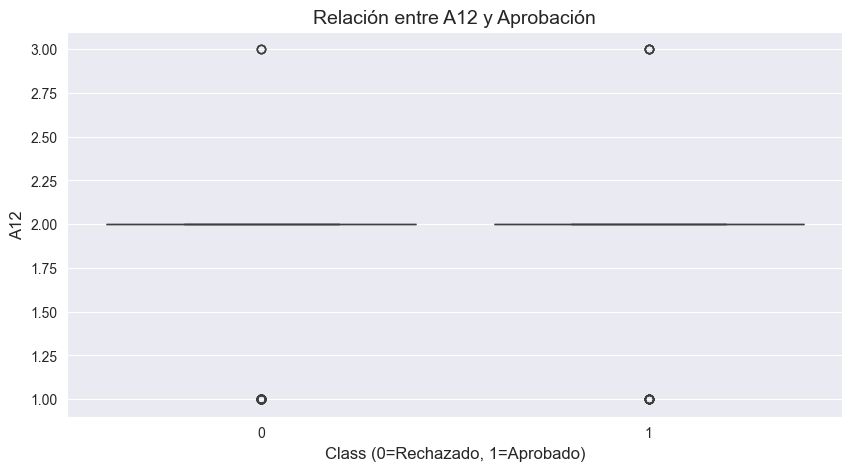

In [ ]:
# Si encuentras una variable con alta correlación con Class, visualízala
import random
import matplotlib.pyplot as plt
import seaborn as sns

otras_variables = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14']
#solamente tendria que considerar algunas , porque algunas son categoricas y otras numericas,
#  pero para el ejemplo se selecciona aleatoriamente.

# Seleccionar una variable aleatoria
variable_interesante = random.choice(otras_variables)

plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y=variable_interesante, data=df)
plt.title(f'Relación entre {variable_interesante} y Aprobación', fontsize=14)
plt.xlabel('Class (0=Rechazado, 1=Aprobado)', fontsize=12)
plt.ylabel(variable_interesante, fontsize=12)  # ¡CORREGIDO!
plt.show()